## Table of Content

- [1 - Packages](#1)
- [2 - Data Preparation](#2)
    - [2.1 - Data Loading and Checking](#2.1)
    - [2.2 - Data Cleaning](#2.2)
- [3 - Model 1 - Multioutput Classification](#3)
- [4 - Model 2 - Collaborative Filtering](#4)
- [5 - Model 3 - Deep Matrix Factorization](#5)

<a id='1'></a>
## 1 - Packages

In [35]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='2'></a>
## 2 - Data Preparation.

<a id='2.1'></a>
### 2.1 - Data Loading and Checking.

### Load data

In [3]:
PATH = 'data'
df = pd.read_csv(os.path.join(PATH, 'train.csv'))

### Check data

In [4]:
pd.set_option('display.max_columns', 20)
df.head(5)

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [5]:
df.shape

(29132, 29)

In [6]:
df.describe()

,birth_year,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
count,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,...,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000
mean,1979.517060,0.001373,0.061101,0.005389,0.010847,0.011637,0.000137,0.014795,0.869422,0.074592,...,0.018502,0.011122,0.003776,0.742448,0.234553,0.010676,0.048915,0.048675,0.030963,0.037828
std,9.325604,0.037030,0.239520,0.073215,0.103585,0.107246,0.011717,0.120733,0.336944,0.262736,...,0.134760,0.104874,0.061333,0.437293,0.423726,0.102771,0.215695,0.215191,0.173219,0.190783
min,1932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
      dtype='object')

<a id='2.2'></a>
### 2.2 - Data Cleaning

Replace all empty values to NAN and check which columns have NAN.

In [8]:
df = df.replace('?', np.nan)
num_nan_col = df.columns[df.isna().any()==True]
num_nan_col

Index(['join_date'], dtype='object')

Check the percentage of NaN in each col.

In [21]:
pct = {}
for i in num_nan_col:
    pct[i] = (df.shape[0] - df[i].value_counts().sum()) / df.shape[0]
for k,v in pct.items():
    print(k, '-->', v)

join_date --> 0.0


The percentage is rather small, so it is valid to be used in the model. Moreover, the empty join_date can not be replaced by mean values. Therefore, drop rows where the join_date is NAN.

In [10]:
df.dropna(subset=['join_date'], axis=0, inplace=True)

### Categorical variables

Check columns.

In [12]:
df.columns

Index(['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1',
       '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
       'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3'],
      dtype='object')

All the columns after 'P5DA' are product code, the rest are user info that we need to input into our model. Hence, we should replace string values in each columns to int.

In [14]:
replace_map = {}
replace_cols = ['sex', 'marital_status', 'branch_code', 'occupation_code', 'occupation_category_code']
for col in replace_cols:
    list_temp = df[col].astype('category').cat.categories.tolist()
    replace_map[col] = {k: v for k,v in zip(list_temp, list(range(1, len(list_temp)+1)))}

replace_map

{'sex': {'F': 1, 'M': 2},
 'marital_status': {'D': 1,
  'M': 2,
  'P': 3,
  'R': 4,
  'S': 5,
  'U': 6,
  'W': 7,
  'f': 8},
 'branch_code': {'1X1H': 1,
  '30H5': 2,
  '49BM': 3,
  '748L': 4,
  '94KC': 5,
  '9F9T': 6,
  'BOAS': 7,
  'E5SW': 8,
  'EU3L': 9,
  'O4JC': 10,
  'O67J': 11,
  'UAOD': 12,
  'X23B': 13,
  'XX25': 14,
  'ZFER': 15},
 'occupation_code': {'00MO': 1,
  '0B60': 2,
  '0KID': 3,
  '0OJM': 4,
  '0PO7': 5,
  '0S50': 6,
  '0SH6': 7,
  '0VYC': 8,
  '1AN5': 9,
  '1DT6': 10,
  '1H8Y': 11,
  '1MB4': 12,
  '1MSV': 13,
  '1NFK': 14,
  '1YKL': 15,
  '2346': 16,
  '2686': 17,
  '2A7I': 18,
  '2BE6': 19,
  '2G86': 20,
  '2HLT': 21,
  '2JHV': 22,
  '2MBB': 23,
  '2R78': 24,
  '2US6': 25,
  '2XZ1': 26,
  '2YAO': 27,
  '31GG': 28,
  '31JW': 29,
  '374O': 30,
  '3NHZ': 31,
  '3X46': 32,
  '3YQ1': 33,
  '44SU': 34,
  '4M0E': 35,
  '4W0D': 36,
  '59QM': 37,
  '5FPK': 38,
  '5JRZ': 39,
  '5LNN': 40,
  '5OVC': 41,
  '6E4H': 42,
  '6KYM': 43,
  '6LKA': 44,
  '6PE7': 45,
  '6SKY': 46,
  '6

In [15]:
df.replace(replace_map, inplace=True)
df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,1,2,1987,1,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,1,2,1981,12,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,2,6,1991,4,177,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,2,2,1990,1,77,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,2,2,1990,4,149,6,0,0,...,0,0,0,0,0,0,1,1,0,0


Change birth_year to age.

In [18]:
age = 2021 - df['birth_year']
df.insert(4, 'age', age)
df.drop('birth_year', axis=1, inplace=True)
df.head()

,ID,join_date,sex,marital_status,age,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,1,2,32,1,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,1,2,38,12,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,2,6,28,4,177,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,2,2,29,1,77,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,2,2,29,4,149,6,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29127,8SBA93U,1/9/2019,1,2,45,4,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
29128,Y73ETTO,1/11/2018,2,2,32,14,171,2,0,0,...,0,0,0,1,0,0,0,0,0,0
29129,MVXG2LC,1/2/2019,2,2,34,7,45,6,0,0,...,0,0,0,1,0,0,0,0,0,0
29130,BUQ8DQN,1/7/2019,2,2,30,12,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0


Change join_date to joined_days as this is a time-dependent feature.

In [34]:
join_date = pd.to_datetime(df['join_date'], format='%d/%m/%Y')
now = pd.to_datetime('01/01/2021', format='%d/%m/%Y')
joined_days = (now - join_date).dt.days
df.insert(1, 'joined_days', joined_days)
df.drop('join_date', axis=1, inplace=True)
df.head()

,ID,joined_days,sex,marital_status,age,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,700,1,2,32,1,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,580,1,2,38,12,18,6,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,2771,2,6,28,4,177,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,519,2,2,29,1,77,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,519,2,2,29,4,149,6,0,0,...,0,0,0,0,0,0,1,1,0,0


<a id='3'></a>
## 3 - Model 1 - Multi-output Classification

<a id='3.1'></a>
### 3.1 - Prepare Training and Validation Data

Feature normalization.

In [42]:
df_norm = df.copy()
max_scaler = preprocessing.MaxAbsScaler()
for label in ['joined_days', 'age']:
    df_norm[label] = max_scaler.fit_transform(df_norm[label].to_numpy().reshape(-1, 1))

min_max_scaler = preprocessing.MinMaxScaler()
for label in ['sex', 'marital_status', 'branch_code', 'occupation_code', 'occupation_category_code']:
    df_norm[label] = min_max_scaler.fit_transform(df_norm[label].to_numpy().reshape(-1, 1))
df_norm.head()

,ID,joined_days,sex,marital_status,age,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,0.179579,0.0,0.142857,0.367816,0.000000,0.073276,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,0.148794,0.0,0.142857,0.436782,0.785714,0.073276,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,0.710877,1.0,0.714286,0.321839,0.214286,0.758621,0.2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,0.133145,1.0,0.142857,0.333333,0.000000,0.327586,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,0.133145,1.0,0.142857,0.333333,0.214286,0.637931,1.0,0,0,...,0,0,0,0,0,0,1,1,0,0


Train/val split.

In [43]:
X = df_norm.iloc[:, 1:8]
y = df_norm.iloc[:, 8:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [44]:
print('Train size:', X_train.shape, y_train.shape)
print('Val size:', X_test.shape, y_test.shape)

Train size: (23304, 7) (23304, 21)
Val size: (5826, 7) (5826, 21)


<a id='3.2'></a>
### 3.2 - Train/Test Model

In [45]:
model = MultiOutputClassifier(RandomForestClassifier(),n_jobs=-1)
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(), n_jobs=-1)

In [47]:
score = model.score(X_train, y_train)
score

0.961079642979746

In [48]:
y_hat = model.predict(X_test)
test_score = accuracy_score(y_test, y_hat)
test_score

0.5690010298661174

<a id='4'></a>

## 4 - Model 2 - Collaborative Filtering

<a id='4.1'></a>
### 4.1 - Prepare Training and Validation Data

Create data matrix.

In [61]:
df_norm.groupby(['ID']).mean()
data_matrix = df_norm.iloc[:, 8:]
print(data_matrix.shape)
data_matrix.head()

(29130, 21)


,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [62]:
data_matrix = data_matrix.to_numpy(dtype=np.int32)

num_usr = data_matrix.shape[0]
num_prod = data_matrix.shape[1]

usr_indices = np.tile(np.arange(num_usr), (num_prod,1)).reshape((num_usr*num_prod, 1), order='F') 
prod_indices = np.tile(np.arange(num_prod), (num_usr,1)).reshape((num_usr*num_prod, 1), order='C')
y_real = data_matrix.reshape(num_usr*num_prod)
x_real = np.concatenate((usr_indices, prod_indices), axis=1)

# split train and val set.
train_index = int(0.2 * y_real.shape[0])
x_train, x_val, y_train, y_val = (x_real[:train_index],
                                  x_real[train_index:],
                                  y_real[:train_index],
                                  y_real[train_index:])

<a id='4.2'></a>
### 4.2 - Train/Test Model

In [63]:
feature_size = 20

class CF_model(keras.Model):
    def __init__(self, num_usr, num_prod, feature_size, **kwargs):
        super(CF_model, self).__init__(**kwargs)
        self.num_usr = num_usr
        self.num_prod = num_prod
        self.feature_size = feature_size
        self.user_embedding = tfl.Embedding(num_usr,
                                               feature_size,
                                               embeddings_initializer="he_normal",
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = tfl.Embedding(num_usr, 1)
        
        self.prod_embedding = tfl.Embedding(num_prod,
                                               feature_size,
                                               embeddings_initializer="he_normal",
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.prod_bias = tfl.Embedding(num_prod, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        prod_vector = self.prod_embedding(inputs[:, 1])
        prod_bias = self.prod_bias(inputs[:, 1])
        dot_user_prod = tf.tensordot(user_vector, prod_vector, 2)
        x = dot_user_prod + user_bias + prod_bias
        return tf.nn.sigmoid(x)

model = CF_model(num_usr, num_prod, feature_size)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [64]:
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/5
1912/1912 [==============================] - 27s 13ms/step - loss: 0.2549 - accuracy: 0.9203 - val_loss: 0.2100 - val_accuracy: 0.9459
Epoch 2/5
1912/1912 [==============================] - 24s 13ms/step - loss: 0.2084 - accuracy: 0.9411 - val_loss: 0.1948 - val_accuracy: 0.9497
Epoch 3/5
1912/1912 [==============================] - 25s 13ms/step - loss: 0.2782 - accuracy: 0.9274 - val_loss: 0.2203 - val_accuracy: 0.9497
Epoch 4/5
1912/1912 [==============================] - 27s 14ms/step - loss: 0.2770 - accuracy: 0.9303 - val_loss: 0.2313 - val_accuracy: 0.9497
Epoch 5/5
1912/1912 [==============================] - 34s 18ms/step - loss: 0.3148 - accuracy: 0.9299 - val_loss: 0.2327 - val_accuracy: 0.9497


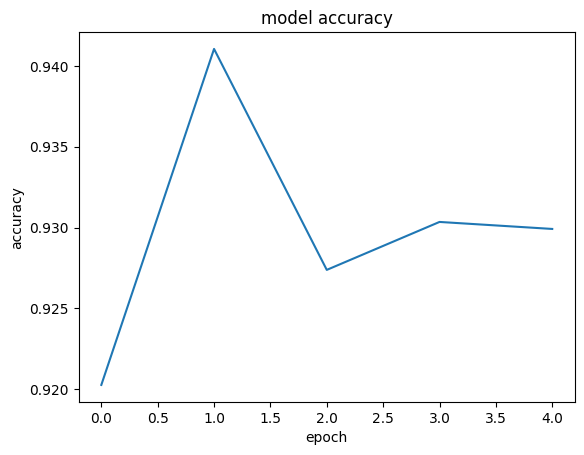

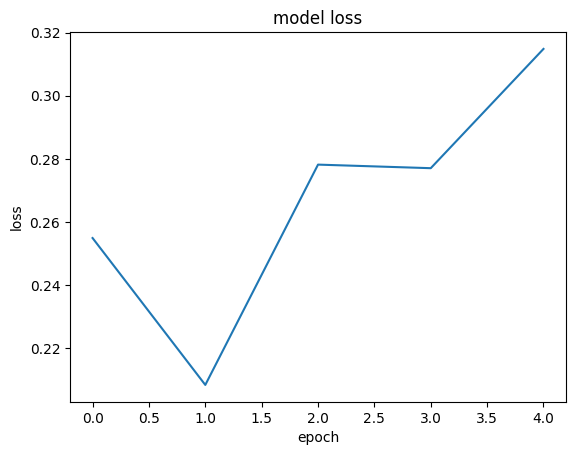

In [65]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

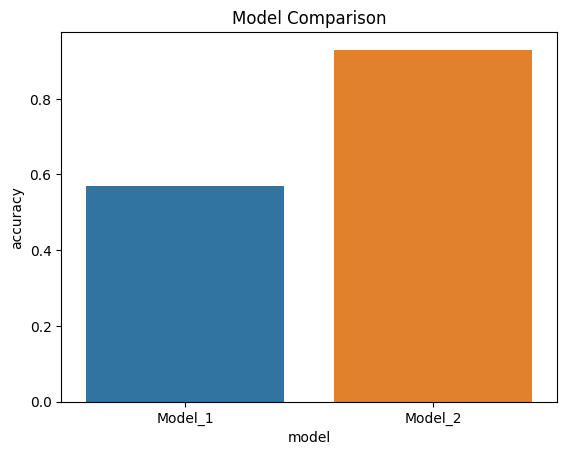

In [68]:
model_2_acc = history.history['accuracy'][-1]
model_1_acc = test_score
acc = {'model': ['Model_1', 'Model_2'], 'accuracy': [model_1_acc, model_2_acc]}
acc = pd.DataFrame(data=acc)

sns.barplot(x='model', y='accuracy', data=acc)
plt.title('Model Comparison')
plt.show()

<a id='5'></a>
## 5 - Model 3 - Deep Matrix Factorization

This model is based on the deep matrix factorization similar to the Xue paper (ref. below). The idea is similar to collaborative filtering but with deep neural networks. The advantage of this model is that there is no need to know any personal information and product features. Based on user activities (e.g., view/purchase records), the model is able to make a good recommender system. In addition, it's a transferable model that allows us to use pretrained model and parameters to get a good prediction.

- Xue, Hong-Jian, et al. - ["Deep matrix factorization models for recommender systems." IJCAI. Vol. 17. 2017.](https://doi.org/10.24963/ijcai.2017/447)

In [69]:
usr_rate = tf.constant(data_matrix)
prod_rate = tf.constant(data_matrix.T)

def cos_similiarity(inputs, eps=1e-6, delta=1e-12):
    [x,y] = inputs
    numerator = tf.math.reduce_sum(x*y, axis=1, keepdims=True)
    denominator = tf.math.sqrt(tf.math.reduce_sum(x*x, axis=1, keepdims=True) * tf.math.reduce_sum(y*y, axis=1, keepdims=True))
    cos_sim = numerator/tf.math.maximum(denominator,delta)
    return tf.math.maximum(cos_sim, eps)

# model
def Deep_matrix_factorization(usr_layers, prod_layers):
    usr_indices = tf.keras.Input(shape=(1,), dtype='int32', name='usr_indices')
    prod_indices = tf.keras.Input(shape=(1,), dtype='int32', name='prod_indices')
    
    usr_rate_slices = tfl.Lambda(lambda x: tf.gather(usr_rate, x), name='uslice')(usr_indices)
    prod_rate_slices = tfl.Lambda(lambda x: tf.gather(prod_rate, x), name='pslice')(prod_indices)
    
    u_layer = tfl.Flatten(name='ulayer0')(usr_rate_slices)
    p_layer = tfl.Flatten(name='player0')(prod_rate_slices)
    
    for i in range(len(usr_layers)):
        u_layer = tfl.Dense(usr_layers[i], activation='relu', name='ulayer'+str(i+1))(u_layer)
    for i in range(len(prod_layers)):
        p_layer = tfl.Dense(prod_layers[i], activation='relu', name='player'+str(i+1))(p_layer)
    
    y_hat = tfl.Lambda(function=cos_similiarity, name='output')([u_layer,p_layer])
    
    model = Model(inputs=[usr_indices,prod_indices], outputs=y_hat)
    return model

In [70]:
# model summary
usr_layers = [16,8]
prod_layers = [16,8]
model = Deep_matrix_factorization(usr_layers, prod_layers)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 usr_indices (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 prod_indices (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 uslice (Lambda)                (None, 1, 21)        0           ['usr_indices[0][0]']            
                                                                                                  
 pslice (Lambda)                (None, 1, 29130)     0           ['prod_indices[0][0]']           
                                                                                              

In [72]:
num_usr = data_matrix.shape[0]
num_prod = data_matrix.shape[1]

usr_indices = np.tile(np.arange(num_usr), (num_prod,1)).reshape(num_usr*num_prod, order='F') 
prod_indices = np.tile(np.arange(num_prod), (num_usr,1)).reshape(num_usr*num_prod, order='C')
y_real = data_matrix.reshape(num_usr*num_prod)
# training model
history2 = model.fit(x=[usr_indices, prod_indices], y=y_real, batch_size=32, epochs=5, shuffle=True)

Epoch 1/5
19117/19117 [==============================] - 135s 7ms/step - loss: 0.1899 - accuracy: 0.9781
Epoch 2/5
19117/19117 [==============================] - 116s 6ms/step - loss: 0.1865 - accuracy: 0.9801
Epoch 3/5
19117/19117 [==============================] - 111s 6ms/step - loss: 0.2924 - accuracy: 0.9735
Epoch 4/5
19117/19117 [==============================] - 112s 6ms/step - loss: 0.3160 - accuracy: 0.9738
Epoch 5/5
19117/19117 [==============================] - 124s 7ms/step - loss: 0.3247 - accuracy: 0.9747


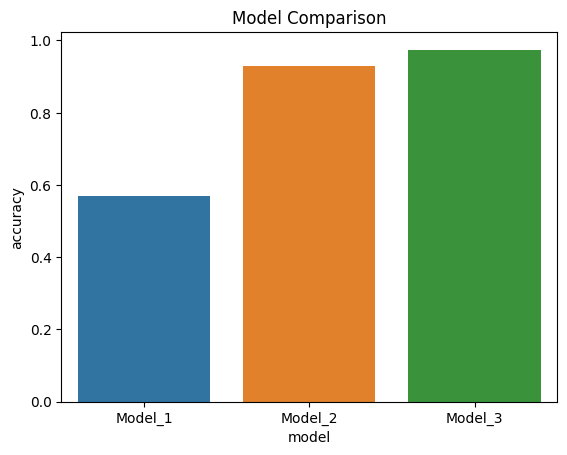

In [73]:
model_3_acc = history2.history['accuracy'][-1]
acc = {'model': ['Model_1', 'Model_2', 'Model_3'], 'accuracy': [model_1_acc, model_2_acc, model_3_acc]}
acc = pd.DataFrame(data=acc)

sns.barplot(x='model', y='accuracy', data=acc)
plt.title('Model Comparison')
plt.show()